In [1]:
from __future__ import print_function

#Data Cleaning

##Cleaning Data

###1: Life and death of Avengers

The Avengers are a well-known and widely loved team of superheroes in the Marvel universe that were introduced in the 1960's in the original comic book series. They've since become popularized again through the recent Disney movies as part of the new Marvel Cinematic Universe.

The team at FiveThirtyEight wanted to dissect the deaths of the Avengers in the comics over the years. The writers were known to kill off and revive many of the superheroes so they were curious to know what data they could grab from the Marvel Wikia <a href = "http://marvel.wikia.com/wiki/Main_Page">site</a>, a fan-driven community site, to explore further. To learn how they collected their data, available on their Github <a href = "https://github.com/fivethirtyeight/data/tree/master/avengers">repo</a>, read the writeup they published on their <a href = "http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/">site</a>.

###2: Exploring the data

While the FiveThirtyEight team has done a wonderful job acquiring this data, the data still has some inconsistencies. Your mission is to clean up their dataset so it can be more useful for analysis in Pandas. First things first, let's read our dataset into Padas as a DataFrame and preview the first 5 rows to get a better sense of our data.

In [2]:
import pandas as pd

avengers = pd.read_csv("data/avengers.csv", encoding="cp1252")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


###3: Filter out the bad years

Since the data was collected from a community site, where most of the contributions came from individual users, there's room for errors to surface in the dataset. If you plot a histogram of the values in the Year column, which describe the year that Avenger was introduced, you'll immediately notice some oddities. There are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy. The Avengers weren't introduced in the comic series until the 1960's!

This is obviously a mistake in the data and you should remove all Avengers before 1960 from the DataFrame.

####Instructions

We only want to keep the Avengers who were introduced after 1960. Filter out all Avengers introduced before 1960 and store only the ones added in 1960 or later in true_avengers.

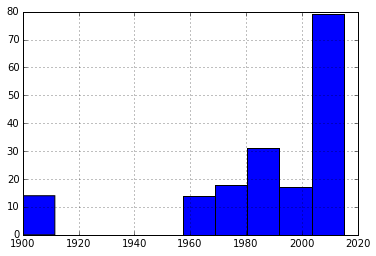

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

true_avengers = pd.DataFrame()

avengers['Year'].hist()
true_avengers = avengers[avengers["Year"] > 1959]

###4: Consolidating deaths

We are interested in the number of total deaths each character experienced and we'd like a field containing that distilled information. Right now, there are 5 fields (Death1 to Death5) that each contain a binary value representing if a superhero experienced that death or not. For example, a superhero can experience Death1, then Death2, etc. until they were no longer brought back to life by the writers.

We'd like to coalesce that information into just one field so we can do numerical analysis more easily.

####Instructions

Create a new column, Deaths, that contains the number of times each superhero died. The possible values for each death field are YES, NO, and the Pandas NaN value used to represent missing data. Keep all of the the original columns (including Death1 to Death5) and update true_avengers with the new Deaths column.

In [4]:
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(lambda row: clean_deaths(row), axis=1)
print("true_avengers['Deaths'][:5]:\n", true_avengers['Deaths'][:5])

true_avengers['Deaths'][:5]:
 0    1
1    1
2    1
3    1
4    2
Name: Deaths, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###5: Years since joining

For the final task, we want to know if the Years since joining field accurately reflects the Year column. If an Avenger was introduced in Year 1960, is the Years since joined value for that Avenger 55?

####Instructions

Calculate the number of rows where Years since joined is accurate. This challenge was created in 2015, so use that as the reference year. We want to know for how many rows Years since joinedwas correctly calculated as Year value subtracted from 2015.

In [5]:
correct_joined_years = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]
joined_accuracy_count = len(correct_joined_years)

print("joined_accuracy_count:", joined_accuracy_count)

joined_accuracy_count: 159
